In [537]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [538]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [539]:
#Оставляем два признака - sepal_length и sepal_width и целевую переменную - variety
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_frame = df[['sepal_length', 'sepal_width']]
iris_frame["variety"] = iris.target
data_class = iris.target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [540]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [541]:
# делим выборку на тренировочную и тестовую части
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_frame, data_class, test_size=0.25)

In [542]:
# импортируем LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [543]:
lda = LinearDiscriminantAnalysis()

In [544]:
#обучаем модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [545]:
# Делаем прогноз на тестовых данных
prediction = lda.predict(X_test)
prediction

array([1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0])

In [546]:
# расчет точности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8157894736842105

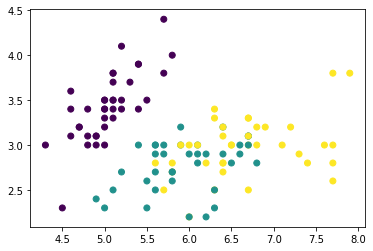

In [547]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train)
plt.show()

In [548]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal_length', 'sepal_width']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal_width', 'sepal_width']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

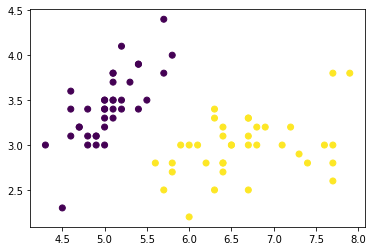

In [549]:
# визуализируем на основании двух признаков и двух классов 
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
plt.show()

In [550]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [551]:
# рассчитаем центроиды
lda_small.means_

array([[5.04210526, 3.43157895],
       [6.65675676, 2.97567568]])

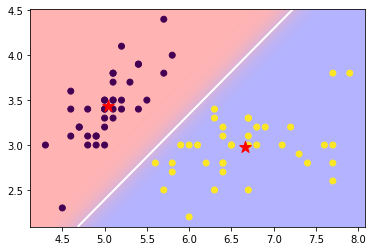

In [552]:
# строим scatter plot
plt.scatter(small_train['sepal_length'], small_train['sepal_width'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [553]:
# исходя из визуализации и выведенных коэффициентов видим, что оба признака одинаково важны для классификации 
lda_small.coef_

array([[  9.86619507, -10.36804623]])

Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [554]:
# генерируем искуственные данные для примера
from sklearn.datasets.samples_generator import make_blobs, make_moons

In [555]:
# 200 точек с 2 центрами, СКО - 2.5
X, y_true = make_blobs(n_samples = 200, centers = 2, cluster_std = 2.5, random_state = 0)

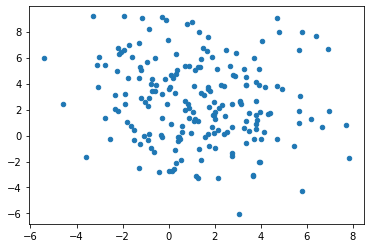

In [556]:
# визуализируем наш набор данных 
plt.scatter(X[:, 0], X[:, 1], s = 20);
plt.show()

In [557]:
# создадим объект KMeans вместе с указанием количества кластеров, обучим модель и сделаем прогноз:

In [558]:
from sklearn.cluster import KMeans

In [559]:
# явно укажем количество кластеров
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1], dtype=int32)

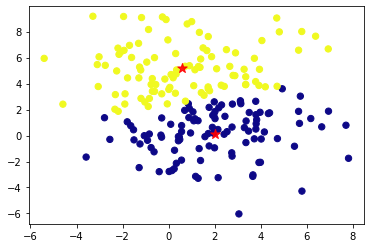

In [560]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 40, cmap = 'plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 100, alpha = 0.9, marker = '*');
plt.show()

In [533]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

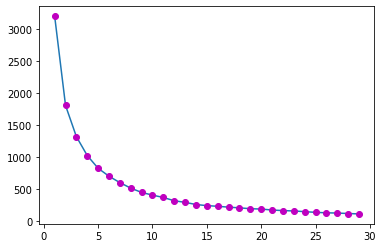

In [534]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'mo')

Для четырех

In [535]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 1, 0, 1, 2, 3, 2, 1, 1, 3, 1, 1, 0, 3, 0, 3, 1, 0, 0, 0, 1, 3,
       2, 3, 2, 3, 1, 2, 1, 3, 3, 1, 0, 1, 2, 3, 3, 1, 2, 3, 3, 0, 1, 2,
       2, 0, 3, 3, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 3, 1, 2, 0,
       3, 0, 2, 3, 0, 3, 1, 1, 2, 0, 2, 3, 1, 1, 2, 0, 3, 3, 3, 2, 3, 1,
       1, 1, 0, 1, 3, 0, 2, 0, 2, 3, 2, 1, 3, 0, 2, 3, 3, 0, 3, 3, 2, 3,
       0, 2, 2, 2, 3, 0, 1, 1, 1, 1, 2, 0, 3, 3, 1, 0, 2, 1, 0, 0, 1, 0,
       3, 0, 1, 0, 3, 1, 2, 0, 2, 3, 2, 3, 0, 0, 3, 3, 0, 2, 1, 3, 2, 2,
       1, 2, 3, 1, 0, 1, 1, 2, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 0, 2, 0, 2,
       2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 1, 1, 3, 1, 1, 3, 0, 2, 0, 2, 0,
       2, 3], dtype=int32)

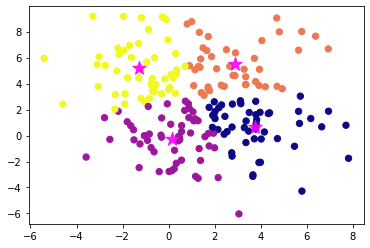

In [536]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 40, cmap = 'plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'magenta', s = 200, alpha = 0.9, marker = '*');
plt.show()
